<a href="https://colab.research.google.com/github/ARUNAGIRI1617/FLAML/blob/main/Prediction_using_FLAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REQUIREMENTS

In [7]:
#For using AutoML Library
!pip install flaml[notebook]


     |████████████████████████████████| 157 kB 28.5 MB/s 
     |████████████████████████████████| 23.1 MB 58.8 MB/s 
     |████████████████████████████████| 2.0 MB 42.7 MB/s 
     |████████████████████████████████| 757 kB 66.6 MB/s 
     |████████████████████████████████| 158 kB 80.9 MB/s 
     |████████████████████████████████| 12.4 MB 176 kB/s 
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=87c2edc0553c38f9a41292fc7d662fb3bda74910cbacba46863feb8e4d704f3e
  Stored in directory: /root/.cache/pip/wheels/9c/9e/f3/6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=947c913e887cb00fcf8eab2768a013d4e6d259c2dff180ecf1c72099105a48ef
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.pos

DATA FETCHING


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv",header = None)

In [2]:

df.columns = ["No of times pregnant","Plasma glucose","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","bmi","Diabetes pedigree function","Age","Class"]
df.columns

Index(['No of times pregnant', 'Plasma glucose', 'Diastolic blood pressure',
       'Triceps skin fold thickness', '2-Hour serum insulin', 'bmi',
       'Diabetes pedigree function', 'Age', 'Class'],
      dtype='object')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,No of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,bmi,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


SPLITING TRAINING AND TESTING DATA



In [5]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

IMPORTING FLAML

In [6]:
from flaml import AutoML
automl = AutoML()

CONFIGURING FLAML

In [11]:
settings = {
"time_budget": 300,  # total runtime in seconds
"metric": 'mse',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
"task": 'regression',  # task type  classification or regression
"log_file_name": 'diabetes_experiment.log',  # flaml log file
}

FITTING THE FLAML MODEL

In [12]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 10-24 14:22:03] {1463} INFO - Data split method: uniform
[flaml.automl: 10-24 14:22:03] {1467} INFO - Evaluation method: cv
[flaml.automl: 10-24 14:22:03] {1515} INFO - Minimizing error metric: mse
[flaml.automl: 10-24 14:22:03] {1552} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree']
[flaml.automl: 10-24 14:22:03] {1793} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-24 14:22:03] {1911} INFO - Estimated sufficient time budget=500s. Estimated necessary time budget=1s.
[flaml.automl: 10-24 14:22:03] {1987} INFO -  at 0.1s,	estimator lgbm's best error=0.1961,	best estimator lgbm's best error=0.1961
[flaml.automl: 10-24 14:22:03] {1793} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-24 14:22:03] {1987} INFO -  at 0.1s,	estimator lgbm's best error=0.1961,	best estimator lgbm's best error=0.1961
[flaml.automl: 10-24 14:22:03] {1793} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-24 14:22:03] {1987} INFO -  at

OUTPUT


In [13]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))



Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 116, 'num_leaves': 6, 'min_child_samples': 6, 'learning_rate': 0.03064127229210535, 'log_max_bin': 7, 'colsample_bytree': 0.8536626772317789, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.8486341169033674}
Best accuracy on validation data: 0.8466
Training duration of best run: 0.1416 s


In [14]:
#To check which is the model selected by FLAML
automl.model

TO SAVE THE MODEL


In [15]:
import pickle
with open('automl.pkl', 'wb') as f:
  pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)


TO CHECK THE PERFORMANCE METRIC 

In [18]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
get_output_from_log(filename=settings['log_file_name'], time_budget=60)

for config in config_history:
  print(config)



{'Current Learner': 'lgbm', 'Current Sample': 614, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 614, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alp

TO CHECK THE LEARNING *CURVE*

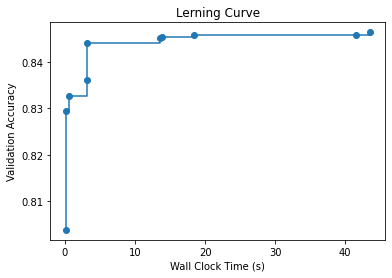

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('Lerning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()